In [1]:
import sys
sys.path.append('../code/')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
import os
from sklearn.preprocessing import StandardScaler
import nibabel as nib

from nilearn import datasets, plotting
from nilearn.maskers import NiftiMapsMasker

import utils

from sklearn.covariance import GraphicalLassoCV
from nilearn.connectome import ConnectivityMeasure
import numpy as np
from nilearn import plotting

import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform


In [2]:
atlas = datasets.fetch_atlas_msdl()
# Loading atlas image stored in 'maps'
atlas_filename = atlas["maps"]
# Loading atlas data stored in 'labels'
labels = atlas["labels"]

df = pd.read_pickle('../data/developmental_df.pkl')
n_subjects = len(np.unique(df['subj'].values))

In [40]:
# time_series = df.iloc[:,:-1].values
time_series = df[df['subj']==0].iloc[:,:-1].values
correlation_measure = ConnectivityMeasure(
    kind="correlation",
    standardize="zscore_sample",
)
correlation_matrix = correlation_measure.fit_transform([time_series])[0]

In [41]:
# plotting.plot_matrix(
#     correlation_matrix,
#     figure=(10, 8),
#     labels=labels,
#     vmax=0.8,
#     vmin=-0.8,
#     title="Correlation",
#     reorder=True,
# )

In [42]:
D = 1 - np.abs(correlation_matrix)
D = np.tril(D) + np.tril(D, -1).T
np.fill_diagonal(D, 0.0)
condensedD = squareform(D)

In [43]:
Y = sch.linkage(condensedD)

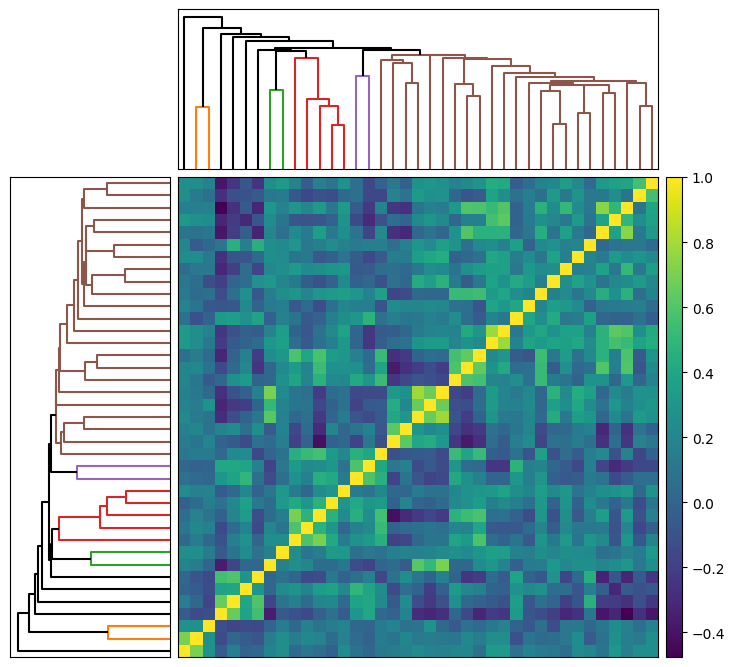

In [45]:


# Compute and plot first dendrogram.
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_axes([0.09, 0.1, 0.2, 0.6])
Y = sch.linkage(condensedD)
Z1 = sch.dendrogram(Y, orientation='left', color_threshold=0.55, above_threshold_color='k')
ax1.set_xticks([])
ax1.set_yticks([])

# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3, 0.71, 0.6, 0.2])
Y = sch.linkage(condensedD)
Z2 = sch.dendrogram(Y, labels=labels, color_threshold=0.55, above_threshold_color='k')
ax2.set_xticks([])
ax2.set_yticks([])

# Plot distance matrix.
axmatrix = fig.add_axes([0.3, 0.1, 0.6, 0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = D[idx1,:]
D = D[:,idx2]
im = axmatrix.matshow(correlation_matrix, aspect='auto', origin='lower')
axmatrix.set_xticks([])  # remove axis labels
axmatrix.set_yticks([])  # remove axis labels

# Plot colorbar.
axcolor = fig.add_axes([0.91, 0.1, 0.02, 0.6])
plt.colorbar(im, cax=axcolor)
plt.show()